In [1]:
import sys
import os
sys.path.append(os.path.join(os.curdir, os.pardir, os.pardir))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from data.mnist import read_data
from net.Model import Model
from common.layer import Dense, Relu, Sigmoid, SoftmaxWithLoss
from optimizer.GradientDescent import GradientDescent

In [3]:
model = Model()
model.add(Dense(784, 50))
model.add(Relu())
model.add(Dense(50, 10))
model.build(SoftmaxWithLoss(), optimizer=GradientDescent(learning_rate=0.1))

print(model.network.layers)
print(model.network.layers_cnt)

OrderedDict([('Dense_1', <common.layer.Dense object at 0x00000200888C7588>), ('Relu_1', <common.layer.Relu object at 0x00000200888C7668>), ('Dense_2', <common.layer.Dense object at 0x00000200888C7780>)])
{'Dense': 2, 'Relu': 1}


In [4]:
data_set = read_data(base_dir='../../mnist_data', one_hot=True)

reading ../../mnist_data\train-images-idx3-ubyte.gz
reading ../../mnist_data\t10k-images-idx3-ubyte.gz
reading ../../mnist_data\train-labels-idx1-ubyte.gz
reading ../../mnist_data\t10k-labels-idx1-ubyte.gz


In [5]:
data_set.train.images.shape

(55000, 784)

In [6]:
model.fit(data_set.train.images, data_set.train.labels, 
          batch_size=100, epochs=20, 
          validation_data=(data_set.test.images, data_set.test.labels))

Epoch 1/21
Iter: 550, train_loss = 0.3515, train_acc = 0.8991, val_loss = 0.3352, val_acc = 0.9029
Epoch 2/21
Iter: 1100, train_loss = 0.2824, train_acc = 0.9185, val_loss = 0.2718, val_acc = 0.9208
Epoch 3/21
Iter: 1650, train_loss = 0.2426, train_acc = 0.9311, val_loss = 0.2365, val_acc = 0.9320
Epoch 4/21
Iter: 2200, train_loss = 0.2064, train_acc = 0.9423, val_loss = 0.2005, val_acc = 0.9405
Epoch 5/21
Iter: 2750, train_loss = 0.1814, train_acc = 0.9492, val_loss = 0.1841, val_acc = 0.9469
Epoch 6/21
Iter: 3300, train_loss = 0.1620, train_acc = 0.9546, val_loss = 0.1703, val_acc = 0.9514
Epoch 7/21
Iter: 3850, train_loss = 0.1458, train_acc = 0.9594, val_loss = 0.1524, val_acc = 0.9563
Epoch 8/21
Iter: 4400, train_loss = 0.1375, train_acc = 0.9606, val_loss = 0.1499, val_acc = 0.9557
Epoch 9/21
Iter: 4950, train_loss = 0.1236, train_acc = 0.9650, val_loss = 0.1347, val_acc = 0.9616
Epoch 10/21
Iter: 5500, train_loss = 0.1138, train_acc = 0.9678, val_loss = 0.1278, val_acc = 0.9628


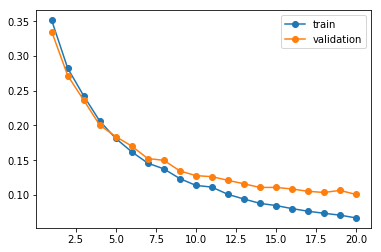

In [7]:
model.plot_history(metric='loss')

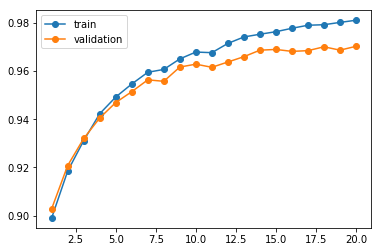

In [8]:
model.plot_history(metric='accuracy')